In [39]:
import numpy as np
import pandas as pd

In [40]:
df = pd.read_csv('data/spam.csv', encoding='ISO-8859-1')

In [41]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1523,ham,Yup ok thanx...,NaN,NaN,NaN
3832,ham,I had askd u a question some hours before. Its...,NaN,NaN,NaN
5129,ham,"Rose for red,red for blood,blood for heart,hea...",NaN,NaN,NaN
1976,ham,Lol alright i was thinkin that too haha,NaN,NaN,NaN
5496,ham,Yes... I trust u to buy new stuff ASAP so I ca...,NaN,NaN,NaN


In [42]:
df.shape

(5572, 5)

1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement
7. Website
8. Deploy

# 1. Data Cleaning


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [44]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [45]:
df.sample(5)

,v1,v2
5181,ham,K sure am in my relatives home. Sms me de. Pls:-)
846,ham,My stomach has been thru so much trauma I swea...
545,ham,Then any special there?
3991,ham,"Dizzamn, aight I'll ask my suitemates when I g..."
1989,ham,The basket's gettin full so I might be by tonight


# Renaming the columns

In [46]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
3511,ham,Already one guy loving you:-.
1413,spam,Dear U've been invited to XCHAT. This is our f...
156,ham,I'm leaving my house now...
5417,ham,Nope. I just forgot. Will show next week
4185,ham,"Hmm ok, i'll stay for like an hour cos my eye ..."


In [47]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [48]:
df['target'] = encoder.fit_transform(df['target'])

In [49]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Missing values

In [50]:
df.isnull().sum()

target    0
text      0
dtype: int64

# Check for duplicate values

In [51]:
df.duplicated().sum()

np.int64(403)

# Remove duplicates

In [52]:
df = df.drop_duplicates(keep='first')

In [53]:
df.duplicated().sum()

np.int64(0)

In [54]:
df.shape

(5169, 2)

# 2. EDA

Розвідувальний аналіз даних (РАД) - це спосіб оцінювання наборів даних з метою виокремлення їхніх суттєвих властивостей, як правило, з використанням візуальних підходів.

In [55]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

Бачимо, що кількість емейлів без спаму 4516, а з спамом - 653

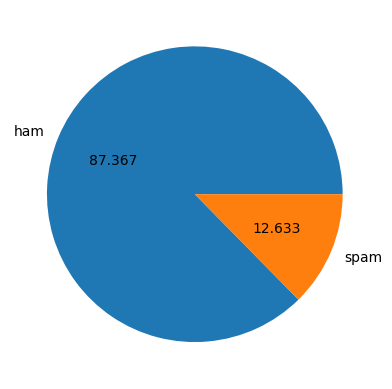

In [57]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=["ham", "spam"], autopct='%0.3f')
plt.show()

Бачимо по пайчарту, що 87.367% емейлів без спаму, а з спамом - 12.633%.

Але маємо імбаланс даних (трошки)

In [58]:
import nltk

In [59]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to E:\CodeDataBase_PC\SMS-Spam-
[nltk_data]     Classifier\.venv\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to E:\CodeDataBase_PC\SMS-
[nltk_data]     Spam-Classifier\.venv\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to E:\CodeDataBase_PC\SMS-
[nltk_data]     Spam-Classifier\.venv\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to E:\CodeDataBase_PC\SMS-
[nltk_data]     Spam-Classifier\.venv\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [60]:
df['num_characters'] = df['text'].apply(len)

In [61]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# Num of words

In [66]:
df['nums_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x, language='english', preserve_line=True)))

In [67]:
df.head()

,target,text,num_characters,nums_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [70]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x, language='english')))

In [72]:
df.head()

,target,text,num_characters,nums_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [73]:
df[['num_characters', 'nums_words', 'num_sentences']].describe()

,num_characters,nums_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,17.864964,1.965564
std,58.236293,12.776749,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,14.000000,1.000000
75%,117.000000,25.000000,2.000000
max,910.000000,215.000000,38.000000


In [76]:
# Емейли без спаму
df[df['target'] == 0][['num_characters', 'nums_words', 'num_sentences']].describe()

,num_characters,nums_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.618468,1.820195
std,56.358207,12.962931,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,21.000000,2.000000
max,910.000000,215.000000,38.000000


In [77]:
# Емейли з спамом
df[df['target'] == 1][['num_characters', 'nums_words', 'num_sentences']].describe()

,num_characters,nums_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,26.485452,2.970904
std,30.137753,6.717242,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,24.000000,2.000000
50%,149.000000,28.000000,3.000000
75%,157.000000,31.000000,4.000000
max,224.000000,46.000000,9.000000


In [79]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

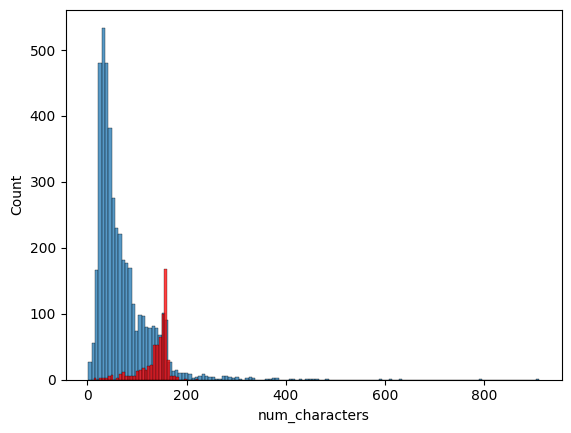

In [82]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

# 3. Text Preprocessing

# 4. Model building

# 5. Evaluation

# 6. Improvement

# 7. Website